In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directorycode
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cybersecurity-1/CTDAPD Dataset.csv
/kaggle/input/cybersecurity-1/cybercrime_forensic_dataset.csv
/kaggle/input/resampled-dataset/resampled_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/resampled-dataset/resampled_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30843 entries, 0 to 30842
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             30843 non-null  float64
 1   Activity_Type       30843 non-null  float64
 2   Resource_Accessed   30843 non-null  float64
 3   Action              30843 non-null  float64
 4   Login_Attempts      30843 non-null  float64
 5   File_Size           30843 non-null  float64
 6   Hour                30843 non-null  float64
 7   File_Info_Missing   30843 non-null  float64
 8   Login_Info_Missing  30843 non-null  float64
 9   Action_Missing      30843 non-null  float64
 10  Anomaly_Missing     30843 non-null  float64
 11  DayOfWeek           30843 non-null  float64
 12  IsWeekend           30843 non-null  float64
 13  IP1                 30843 non-null  float64
 14  IP2                 30843 non-null  float64
 15  IP3                 30843 non-null  float64
 16  IP4 

In [5]:
df.head(5)

,User_ID,Activity_Type,Resource_Accessed,Action,Login_Attempts,File_Size,Hour,File_Info_Missing,Login_Info_Missing,Action_Missing,...,IP2,IP3,IP4,IsPrivateIP,File_Size_Log,Anomaly_Label,Timestamp,IP_Address,File_Name,Anomaly_Type
0,1.456951,-0.489772,-0.347906,-1.480099,-0.535093,1.303422,0.060322,-1.146906,0.630512,-0.407089,...,0.892752,1.481586,-1.633604,0.0,1.363654,-2.372336,2024-09-14 14:25:50.415952,10.85.183.190,NaN,DDoS_Attempt
1,-1.526275,1.510401,1.095147,0.019659,-0.535093,-0.694189,0.489810,0.871911,0.630512,-0.407089,...,-1.175694,0.017147,1.215551,0.0,-0.821873,-3.695965,2024-09-20 16:45:33.981822,10.10.100.138,NaN,Brute_Force
2,-0.962867,-0.489772,0.133112,1.019498,-0.535093,0.713782,0.346647,-1.146906,0.630512,2.456465,...,0.812683,1.006999,0.081291,0.0,1.150695,-2.372336,2024-09-15 21:48:48.007672,10.212.116.115,NaN,DDoS_Attempt
3,-1.542195,0.510314,-1.598551,-1.480099,-0.535093,-0.694189,1.491948,0.871911,0.630512,-0.407089,...,0.158787,-0.064210,-0.067244,0.0,-0.821873,0.274921,2024-10-03 02:56:46.858758,192.168.64.186,NaN,NaN
4,-0.728340,1.510401,-0.828923,1.519417,-0.535093,-0.694189,-0.512329,0.871911,0.630512,-0.407089,...,-1.122315,-1.691364,-1.188001,0.0,-0.821873,0.274921,2024-09-29 03:34:15.399512,10.198.113.65,report1.pdf,NaN


In [6]:
df.isna().sum()

User_ID                   0
Activity_Type             0
Resource_Accessed         0
Action                    0
Login_Attempts            0
File_Size                 0
Hour                      0
File_Info_Missing         0
Login_Info_Missing        0
Action_Missing            0
Anomaly_Missing           0
DayOfWeek                 0
IsWeekend                 0
IP1                       0
IP2                       0
IP3                       0
IP4                       0
IsPrivateIP               0
File_Size_Log             0
Anomaly_Label             0
Timestamp                 0
IP_Address                0
File_Name             17578
Anomaly_Type           6167
dtype: int64

In [7]:
df["Anomaly_Type"].unique()

array(['DDoS_Attempt', 'Brute_Force', nan, 'Data_Exfil', 'USB_Access'],
      dtype=object)

In [8]:
df["Anomaly_Type"] = df["Anomaly_Type"].fillna("Begin")

In [9]:
df.isna().sum()

User_ID                   0
Activity_Type             0
Resource_Accessed         0
Action                    0
Login_Attempts            0
File_Size                 0
Hour                      0
File_Info_Missing         0
Login_Info_Missing        0
Action_Missing            0
Anomaly_Missing           0
DayOfWeek                 0
IsWeekend                 0
IP1                       0
IP2                       0
IP3                       0
IP4                       0
IsPrivateIP               0
File_Size_Log             0
Anomaly_Label             0
Timestamp                 0
IP_Address                0
File_Name             17578
Anomaly_Type              0
dtype: int64

In [10]:
df["File_Name"].unique()

array([nan, 'report1.pdf', 'document2.docx', 'data.csv',
       'new_project.docx', 'report2.pdf', 'secrets.txt'], dtype=object)

In [11]:
df["File_Name"] = df["File_Name"].fillna("Begin")

In [12]:
df["File_Name"].unique()

array(['Begin', 'report1.pdf', 'document2.docx', 'data.csv',
       'new_project.docx', 'report2.pdf', 'secrets.txt'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Anomaly_Type'])
Labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Label Mapping: {'Begin': 0, 'Brute_Force': 1, 'DDoS_Attempt': 2, 'Data_Exfil': 3, 'USB_Access': 4}


In [14]:
df = df.drop(columns=['Timestamp', 'IP_Address', 'File_Name', 'Anomaly_Type'])

In [15]:
import torch
import numpy as np

feature_cols = df.columns.drop('label')
X = torch.tensor(df[feature_cols].values, dtype=torch.float32)

y = torch.tensor(df['label'].values, dtype=torch.long)


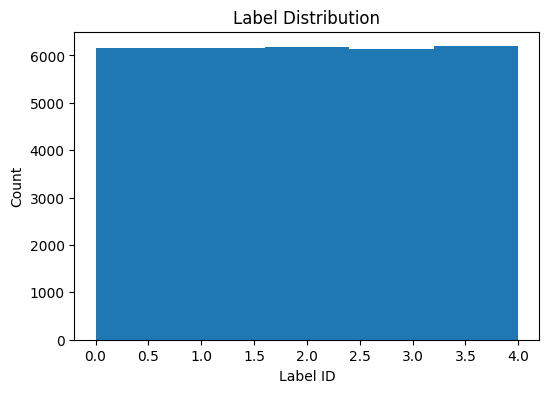

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(y.numpy(), bins=len(torch.unique(y)))
plt.title("Label Distribution")
plt.xlabel("Label ID")
plt.ylabel("Count")
plt.show()


In [17]:
import pandas as pd

feature_stats = pd.DataFrame({
    "mean": X.mean(dim=0).numpy(),
    "std": X.std(dim=0).numpy()
}, index=feature_cols)

feature_stats.head(10)   # first 10 features


,mean,std
User_ID,0.011342,0.908471
Activity_Type,0.023558,0.976885
Resource_Accessed,-0.032174,0.905449
Action,0.007943,0.942570
Login_Attempts,-0.051454,0.923380
File_Size,-0.007937,0.962908
Hour,0.021811,0.908858
File_Info_Missing,-0.000105,0.998084
Login_Info_Missing,0.024125,0.975193
Action_Missing,0.010629,0.993120


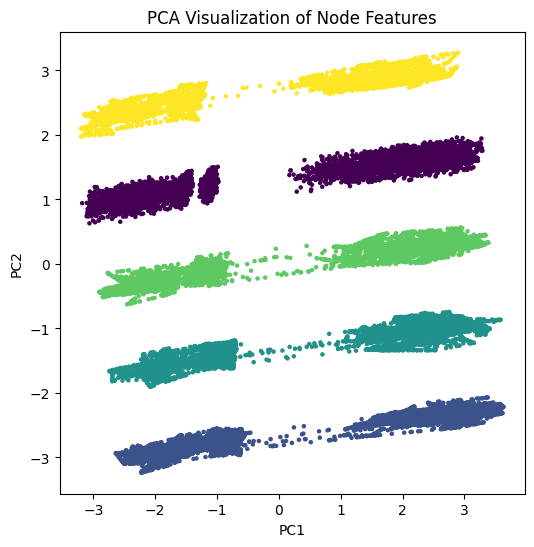

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.numpy())

plt.figure(figsize=(6,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y.numpy(), s=5)
plt.title("PCA Visualization of Node Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [19]:
from sklearn.neighbors import kneighbors_graph
import torch
import numpy as np

# X is already prepared from your code
X_np = X.numpy()   # convert to numpy

k = 10  # number of neighbors

# Build adjacency matrix using sklearn
A = kneighbors_graph(X_np, n_neighbors=k, mode='connectivity', include_self=False)
A = A.toarray()

# Convert adjacency matrix to edge index
edge_index = torch.tensor(np.vstack(np.where(A == 1)), dtype=torch.long)

print("Edge Index Shape:", edge_index.shape)
print("Total Edges:", edge_index.shape[1])


Edge Index Shape: torch.Size([2, 308430])
Total Edges: 308430


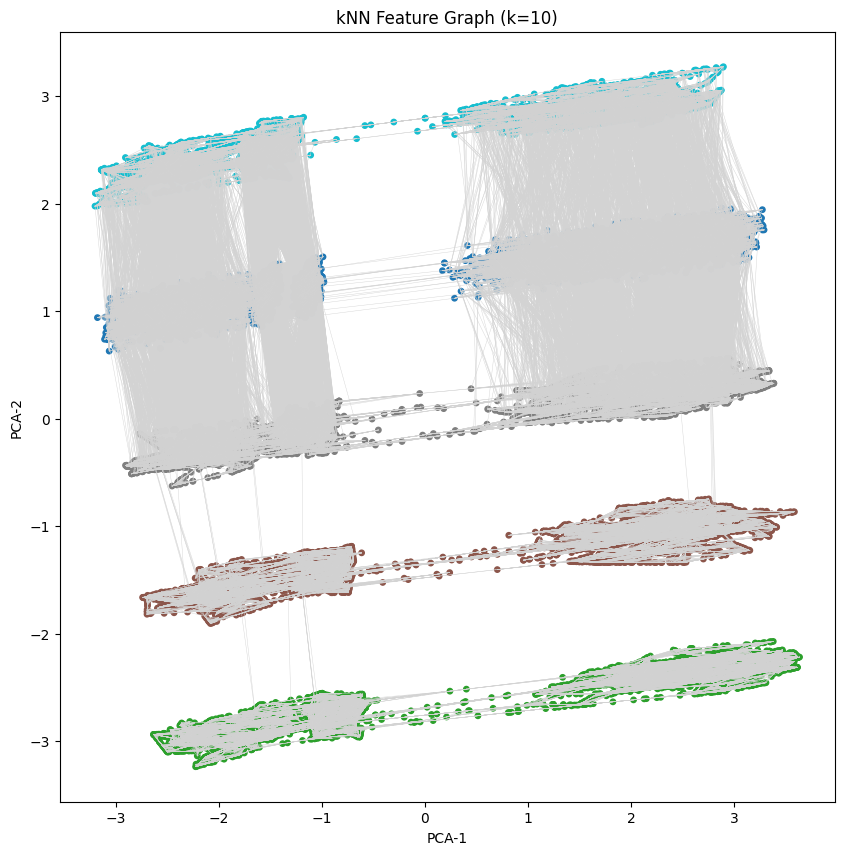

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_np)

plt.figure(figsize=(10, 10))

# Draw edges
for i, j in edge_index.T:
    x1, y1 = X_2d[i]
    x2, y2 = X_2d[j]
    plt.plot([x1, x2], [y1, y2], color='lightgray', linewidth=0.3)

# Draw nodes
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', s=15)
plt.title("kNN Feature Graph (k=10)")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.show()


In [21]:
from sklearn.neighbors import kneighbors_graph
import torch
import numpy as np
import matplotlib.pyplot as plt

# Build KNN graph again with k = 5
k = 5
knn_graph = kneighbors_graph(X.numpy(), k, mode='connectivity', include_self=False)
edge_index = torch.tensor(np.vstack(knn_graph.nonzero()), dtype=torch.long)

print("Edge Index Shape:", edge_index.shape)
print("Total Edges:", edge_index.shape[1])



Edge Index Shape: torch.Size([2, 154215])
Total Edges: 154215


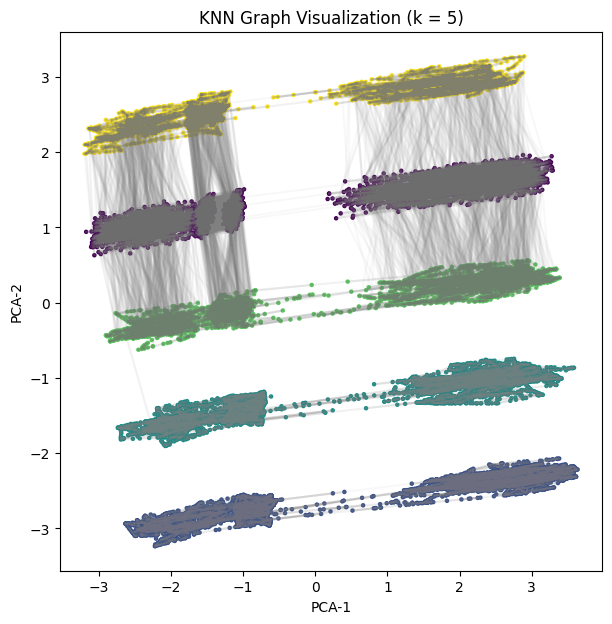

In [22]:
plt.figure(figsize=(7,7))

# plot edges
for i in range(edge_index.shape[1]):
    src = edge_index[0, i]
    dst = edge_index[1, i]
    plt.plot([X_2d[src,0], X_2d[dst,0]], 
             [X_2d[src,1], X_2d[dst,1]], 
             color='gray', alpha=0.05)

# plot nodes
plt.scatter(X_2d[:,0], X_2d[:,1], c=y.numpy(), s=5)
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.title(f"KNN Graph Visualization (k = {k})")
plt.show()


In [23]:
import numpy as np
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---------------------------
# Load your data (X, y)
# ---------------------------
# X must be numpy array
X_np = X.numpy()

# ---------------------------
# Compute modularity
# ---------------------------
def compute_modularity(edge_index, labels):
    G = nx.Graph()
    G.add_edges_from(edge_index.T)
    partition = {i: int(labels[i]) for i in range(len(labels))}
    modularity = community_louvain.modularity(partition, G)
    return modularity

# ---------------------------
# Run K = 2..15
# ---------------------------
results = []

for k in range(2, 16):
    print(f"Processing k = {k}")

    # Build KNN graph
    knn_graph = kneighbors_graph(X_np, k, mode='connectivity', include_self=False)
    edge_index = np.vstack(knn_graph.nonzero())

    # KMeans clustering (for silhouette & modularity)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_np)

    # Silhouette score
    try:
        sil = silhouette_score(X_np, cluster_labels)
    except:
        sil = 0  # fallback if silhouette fails

    # Modularity score
    modularity = compute_modularity(edge_index, cluster_labels)

    results.append({
        "k": k,
        "silhouette": sil,
        "modularity": modularity
    })

# ---------------------------
# Normalize + final score
# ---------------------------
df_knn = pd.DataFrame(results)

def safe_norm(column):
    mn, mx = column.min(), column.max()
    if mx - mn == 0:
        return np.zeros(len(column))
    return (column - mn) / (mx - mn)

df_knn["sil_norm"] = safe_norm(df_knn["silhouette"])
df_knn["mod_norm"] = safe_norm(df_knn["modularity"])

df_knn["score"] = 0.5 * df_knn["sil_norm"] + 0.5 * df_knn["mod_norm"]

# ---------------------------
# Pick best k
# ---------------------------
best_k = df_knn.loc[df_knn["score"].idxmax(), "k"]

print("\n========== FINAL RESULTS ==========")
print(df_knn)
print("\nBest k =", best_k)
best_k


Processing k = 2
Processing k = 3
Processing k = 4
Processing k = 5
Processing k = 6
Processing k = 7
Processing k = 8
Processing k = 9
Processing k = 10
Processing k = 11
Processing k = 12
Processing k = 13
Processing k = 14
Processing k = 15

========== FINAL RESULTS ==========
     k  silhouette  modularity  sil_norm  mod_norm     score
0    2    0.189496    0.489957  1.000000  0.000000  0.500000
1    3    0.160877    0.641591  0.541836  0.399909  0.470872
2    4    0.147538    0.727642  0.328291  0.626851  0.477571
3    5    0.140613    0.789573  0.217432  0.790185  0.503808
4    6    0.138450    0.801709  0.182802  0.822192  0.502497
5    7    0.129995    0.820020  0.047440  0.870483  0.458961
6    8    0.138989    0.837656  0.191423  0.916994  0.554208
7    9    0.134908    0.853528  0.126090  0.958855  0.542473
8   10    0.133475    0.856034  0.103147  0.965462  0.534305
9   11    0.133710    0.851897  0.106923  0.954554  0.530739
10  12    0.133572    0.869129  0.104700  1.0000

8

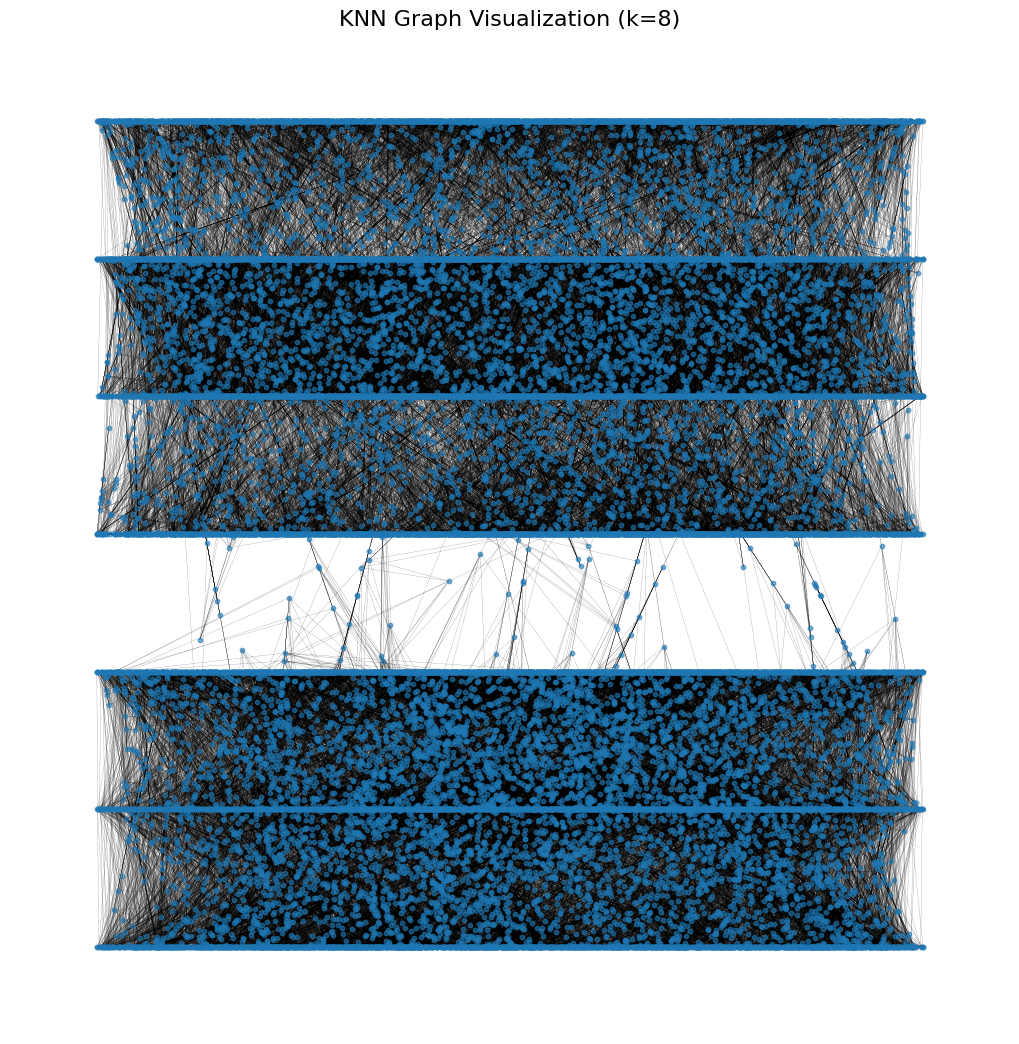

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.neighbors import kneighbors_graph

# ==== PARAMETERS ====
k = 8   # best K found earlier

# ==== BUILD GRAPH ====
knn_graph = kneighbors_graph(X.numpy(), k, mode='connectivity', include_self=False)
edge_index = np.vstack(knn_graph.nonzero())

# Build NetworkX Graph
G = nx.Graph()
edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

# Use embeddings as positions (2D)
pos = {i: (X[i,0].item(), X[i,1].item()) for i in range(len(X))}

# ==== PLOT ====
plt.figure(figsize=(10, 10))

nx.draw(
    G,
    pos,
    node_size=10,
    width=0.15,
    edge_color="black",
    alpha=0.6
)

plt.title(f"KNN Graph Visualization (k={k})", fontsize=16)
plt.axis("off")
plt.show()


In [25]:
import torch
import numpy as np

feature_cols = df.columns.drop('label')
X = torch.tensor(df[feature_cols].values, dtype=torch.float32)

y = torch.tensor(df['label'].values, dtype=torch.long)

In [26]:
pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.5.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
Note: you may need to restart the kernel to use updated packages.


Using device: cuda
Nodes = 30843
Feature dimension F = 20
Classes = 5
gcn Epoch 10 | Loss=1.6144 | Val Acc=0.2650
gcn Epoch 20 | Loss=1.4613 | Val Acc=0.3317
gcn Epoch 30 | Loss=1.3445 | Val Acc=0.4124
gcn Epoch 40 | Loss=1.2445 | Val Acc=0.4761
gcn Epoch 50 | Loss=1.1601 | Val Acc=0.5428
gcn Epoch 60 | Loss=1.0899 | Val Acc=0.5990
gcn Epoch 70 | Loss=1.0329 | Val Acc=0.6405
gcn Epoch 80 | Loss=0.9754 | Val Acc=0.6882
gcn Epoch 90 | Loss=0.9219 | Val Acc=0.7271
gcn Epoch 100 | Loss=0.8754 | Val Acc=0.7601
gcn Epoch 110 | Loss=0.8328 | Val Acc=0.7923
gcn Epoch 120 | Loss=0.8008 | Val Acc=0.8159
gat Epoch 10 | Loss=1.4448 | Val Acc=0.3538
gat Epoch 20 | Loss=1.2818 | Val Acc=0.4507
gat Epoch 30 | Loss=1.1782 | Val Acc=0.5408
gat Epoch 40 | Loss=1.0923 | Val Acc=0.6044
gat Epoch 50 | Loss=1.0253 | Val Acc=0.6527
gat Epoch 60 | Loss=0.9683 | Val Acc=0.6989
gat Epoch 70 | Loss=0.9105 | Val Acc=0.7507
gat Epoch 80 | Loss=0.8585 | Val Acc=0.7892
gat Epoch 90 | Loss=0.8248 | Val Acc=0.8268
gat

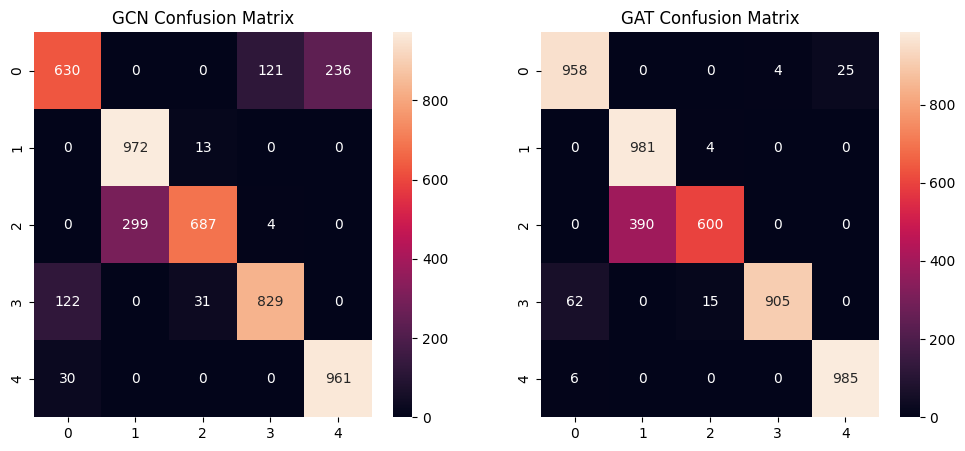

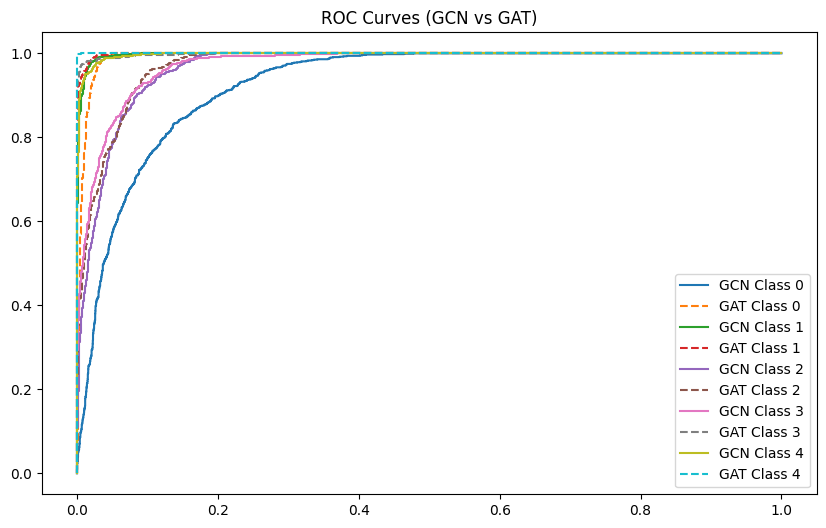

TypeError: '>' not supported between instances of 'module' and 'int'

In [31]:
# ==============================================
# FINAL KAGGLE ONE-CELL PIPELINE (GCN + GAT)
# Uses GPU, saves models to /kaggle/working/
# Max epochs = 80, Early stopping enabled
# ==============================================
import os, numpy as np, torch, matplotlib.pyplot as plt, networkx as nx
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
import seaborn as sns
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv
import warnings
warnings.filterwarnings("ignore")

# -------- Kaggle GPU --------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------- Required inputs: X, y --------

# Extract features and labels
# feature_cols = df.columns.drop('label')
# X = torch.tensor(df[feature_cols].values, dtype=torch.float32)
# y = torch.tensor(df['label'].values, dtype=torch.long)

# Ensure correct dtypes
X = X.float()
y = y.long()

# Number of samples and feature dimension
N, num_features = X.shape
num_classes = int(y.max().item()) + 1

print("Nodes =", N)
print("Feature dimension F =", num_features)
print("Classes =", num_classes)

# -------- Output directory --------
model_dir = "/kaggle/working/"
os.makedirs(model_dir, exist_ok=True)

# -------- Build kNN graph (best_k=8) --------
best_k = 8
A = kneighbors_graph(X.cpu().numpy(), n_neighbors=best_k, mode='connectivity')
src, dst = A.nonzero()
edge_index = torch.tensor(np.vstack([src, dst]), dtype=torch.long)

data = Data(x=X, edge_index=edge_index, y=y)

# -------- Train / Val / Test split --------
idx = np.arange(N)
train_idx, test_idx = train_test_split(idx, test_size=0.16, stratify=y.numpy(), random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.1765, stratify=y.numpy()[train_idx], random_state=42)

data.train_mask = torch.zeros(N, dtype=torch.bool)
data.val_mask   = torch.zeros(N, dtype=torch.bool)
data.test_mask  = torch.zeros(N, dtype=torch.bool)

data.train_mask[train_idx] = True
data.val_mask[val_idx] = True
data.test_mask[test_idx] = True

data = data.to(device)

# -------- MODELS --------
class GCN(torch.nn.Module):
    def __init__(self, in_ch, hid=64, out_ch=None):
        super().__init__()
        self.c1 = GCNConv(in_ch, hid)
        self.c2 = GCNConv(hid, out_ch)
    def forward(self, x, ei):
        x = F.relu(self.c1(x, ei))
        x = F.dropout(x, 0.4, training=self.training)
        return self.c2(x, ei)

class GAT(torch.nn.Module):
    def __init__(self, in_ch, hid=16, out_ch=None):
        super().__init__()
        self.g1 = GATConv(in_ch, hid, heads=8, dropout=0.4)
        self.g2 = GATConv(hid*8, out_ch, heads=1, concat=False, dropout=0.4)
    def forward(self, x, ei):
        x = F.elu(self.g1(x, ei))
        x = F.dropout(x, 0.4, training=self.training)
        return self.g2(x, ei)

gcn = GCN(num_features, 64, num_classes).to(device)
gat = GAT(num_features, 16, num_classes).to(device)

# -------- Training helpers --------
def train_epoch(model, opt, mask):
    model.train()
    opt.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[mask], data.y[mask])
    loss.backward()
    opt.step()
    return loss.item()

@torch.no_grad()
def eval_model(model, mask):
    model.eval()
    out = model(data.x, data.edge_index)
    preds = out.argmax(dim=1).cpu().numpy()
    probs = F.softmax(out, dim=1).cpu().numpy()
    labels = data.y.cpu().numpy()
    acc = (preds[mask.cpu().numpy()] == labels[mask.cpu().numpy()]).mean()
    return acc, preds, probs, labels


# -------- TRAIN WITH EARLY STOPPING --------
def train_model(model, name, lr=1e-3, wd=5e-4, max_epochs=120, patience=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    best_acc = -1
    best_state = None
    patience_count = 0

    for epoch in range(1, max_epochs+1):
        loss = train_epoch(model, optimizer, data.train_mask)
        val_acc, _, _, _ = eval_model(model, data.val_mask)

        if val_acc > best_acc:
            best_acc = val_acc
            patience_count = 0
            best_state = model.state_dict()
            torch.save(best_state, f"{model_dir}/{name}_best.pth")
        else:
            patience_count += 1

        if epoch % 10 == 0:
            print(f"{name} Epoch {epoch} | Loss={loss:.4f} | Val Acc={val_acc:.4f}")

        if patience_count >= patience:
            print(f"{name} Early Stopping @ epoch {epoch}")
            break

    model.load_state_dict(best_state)
    return model

# -------- Train both models --------
gcn = train_model(gcn, "gcn")
gat = train_model(gat, "gat")

# -------- Test results --------
gcn_acc, gcn_preds, gcn_probs, labels = eval_model(gcn, data.test_mask)
gat_acc, gat_preds, gat_probs, _ = eval_model(gat, data.test_mask)

print("\nGCN Test Accuracy:", gcn_acc)
print("GAT Test Accuracy:", gat_acc)

# -------- Confusion matrices --------
test_ids = data.test_mask.cpu().numpy().nonzero()[0]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(labels[test_ids], gcn_preds[test_ids]), annot=True, fmt="d")
plt.title("GCN Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(labels[test_ids], gat_preds[test_ids]), annot=True, fmt="d")
plt.title("GAT Confusion Matrix")
plt.show()

# -------- ROC curves --------
y_bin = label_binarize(labels[test_ids], classes=np.arange(num_classes))

plt.figure(figsize=(10,6))
for c in range(num_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, c], gcn_probs[test_ids][:, c])
    plt.plot(fpr, tpr, label=f'GCN Class {c}')

    fpr, tpr, _ = roc_curve(y_bin[:, c], gat_probs[test_ids][:, c])
    plt.plot(fpr, tpr, linestyle='--', label=f'GAT Class {c}')

plt.title("ROC Curves (GCN vs GAT)")
plt.legend()
plt.show()

# -------- Example: Load Model & Predict --------
loaded_gcn = GCN(F, 64, num_classes).to(device)
loaded_gcn.load_state_dict(torch.load("/kaggle/working/gcn_best.pth"))
loaded_gcn.eval()

with torch.no_grad():
    out = loaded_gcn(data.x, data.edge_index)
    example_pred = out.argmax(dim=1)[0].item()

print("Example loaded model prediction for node 0:", example_pred)


In [32]:

# -------- Example: Load Model & Predict --------
loaded_gcn = GCN(num_features, 64, num_classes).to(device)
loaded_gcn.load_state_dict(torch.load("/kaggle/working/gcn_best.pth"))
loaded_gcn.eval()

with torch.no_grad():
    out = loaded_gcn(data.x, data.edge_index)
    example_pred = out.argmax(dim=1)[0].item()

print("Example loaded model prediction for node 0:", example_pred)

Example loaded model prediction for node 0: 2
